# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('busiest_airport_airline_delays.csv')

# Preprocessing

In [3]:
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,MORNING,1,229,142,United Air Lines Inc.,32102,48104,...,19,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
1,3,0,3,MORNING,1,229,120,United Air Lines Inc.,32102,48104,...,22,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
2,3,0,9,MORNING,1,229,142,United Air Lines Inc.,32102,48104,...,24,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
3,3,0,1,EARLY_MORNING,1,4,128,American Airlines Inc.,32102,75591,...,20,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47
4,3,0,2,MORNING,1,229,50,SkyWest Airlines Inc.,32102,69699,...,21,Atlanta Municipal,33.641,-84.427,NONE,0.0,0.0,0.0,72.0,4.47


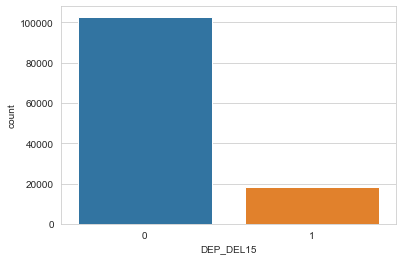

In [4]:
sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data)
plt.show()

## Data Cleaning

In [5]:
data = data.drop_duplicates()
data = data.drop(columns=['AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AIRLINE_FLIGHTS_MONTH',
                          'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS'])
data = data.drop(columns=['LATITUDE','LONGITUDE'])
data = data.drop(columns=['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS'])
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,MORNING,1,United Air Lines Inc.,361,19,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
1,3,0,3,MORNING,1,United Air Lines Inc.,361,22,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
2,3,0,9,MORNING,1,United Air Lines Inc.,361,24,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
3,3,0,1,EARLY_MORNING,1,American Airlines Inc.,892,20,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47
4,3,0,2,MORNING,1,SkyWest Airlines Inc.,2048,21,Atlanta Municipal,NONE,0.0,0.0,0.0,72.0,4.47


## Handling Categorical Data

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['DEP_BLOCK']= label_encoder.fit_transform(data['DEP_BLOCK'])
data['CARRIER_NAME']= label_encoder.fit_transform(data['CARRIER_NAME'])
data['DEPARTING_AIRPORT']= label_encoder.fit_transform(data['DEPARTING_AIRPORT'])
data['PREVIOUS_AIRPORT']= label_encoder.fit_transform(data['PREVIOUS_AIRPORT'])

In [7]:
data.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,0,5,5,1,15,361,19,0,178,0.0,0.0,0.0,72.0,4.47
1,3,0,3,5,1,15,361,22,0,178,0.0,0.0,0.0,72.0,4.47
2,3,0,9,5,1,15,361,24,0,178,0.0,0.0,0.0,72.0,4.47
3,3,0,1,1,1,2,892,20,0,178,0.0,0.0,0.0,72.0,4.47
4,3,0,2,5,1,12,2048,21,0,178,0.0,0.0,0.0,72.0,4.47


## Transform Data

## Split Data

In [8]:
# data_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# data_target yang khusus hanya akan berisi label/kelas/target 
df_feat = data.drop('DEP_DEL15',axis=1) 
df_feat.head()

,DAY_OF_WEEK,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CARRIER_NAME,AIRLINE_AIRPORT_FLIGHTS_MONTH,PLANE_AGE,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,3,5,5,1,15,361,19,0,178,0.0,0.0,0.0,72.0,4.47
1,3,3,5,1,15,361,22,0,178,0.0,0.0,0.0,72.0,4.47
2,3,9,5,1,15,361,24,0,178,0.0,0.0,0.0,72.0,4.47
3,3,1,1,1,2,892,20,0,178,0.0,0.0,0.0,72.0,4.47
4,3,2,5,1,12,2048,21,0,178,0.0,0.0,0.0,72.0,4.47


In [9]:
# df_target yang khusus hanya akan berisi label/kelas/target, yaitu apakah positif kanker ganas atau tidak
df_target = data['DEP_DEL15'] 
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: DEP_DEL15, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  83811  | Jumlah Test Data :  35920


## Oversampling Data

In [11]:
oversample = imblearn.over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

0    71137
1    71137
Name: DEP_DEL15, dtype: int64

## Standardized data

In [12]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()
X_train_scaled = StdScaler.fit_transform(X_train)
X_test_scaled = StdScaler.transform(X_test)
X_test_scaled

array([[ 0.60100098,  0.98880768, -1.37136243, ..., -0.33473669,
         0.30562724,  1.86261095],
       [ 0.05142895, -1.23666559, -1.37136243, ..., -0.33473669,
        -0.03466208, -0.91025487],
       [ 0.05142895,  0.43243936,  0.35873311, ..., -0.33473669,
        -0.11973441, -0.64743798],
       ...,
       [ 1.70014504, -1.23666559,  1.51213014, ..., -0.33473669,
         0.39069958,  0.3447696 ],
       [ 0.60100098, -1.23666559, -0.2179654 , ..., -0.33473669,
         0.30562724, -0.97817384],
       [-1.04771511, -0.68029727, -1.37136243, ..., -0.33473669,
        -0.8853854 ,  0.27685063]])

# Modelling

## Neural Network

In [13]:
clf = MLPClassifier(hidden_layer_sizes = (50,50,50),
                    random_state = 0, activation = "relu",
                    solver = "adam")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of NN classifier on training set: 0.84
Accuracy of NN classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     30535
           1       0.30      0.29      0.30      5385

    accuracy                           0.79     35920
   macro avg       0.59      0.59      0.59     35920
weighted avg       0.79      0.79      0.79     35920



In [14]:
clf = MLPClassifier(hidden_layer_sizes = [8,20], random_state = 0,
                    activation = "tanh", solver = "adam")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of NN classifier on training set: 0.75
Accuracy of NN classifier on test set: 0.70
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     30535
           1       0.24      0.45      0.31      5385

    accuracy                           0.70     35920
   macro avg       0.56      0.60      0.56     35920
weighted avg       0.79      0.70      0.73     35920



In [15]:
clf = MLPClassifier(hidden_layer_sizes = (50,50,50), random_state = 0,
                    activation = "identity", solver = "adam")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Accuracy of NN classifier on training set: 0.62
Accuracy of NN classifier on test set: 0.62
              precision    recall  f1-score   support

           0       0.88      0.65      0.74     30535
           1       0.20      0.49      0.28      5385

    accuracy                           0.62     35920
   macro avg       0.54      0.57      0.51     35920
weighted avg       0.78      0.62      0.67     35920



In [18]:
clf = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100),
                    random_state = 0, activation = "logistic",
                    solver = "adam")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of NN classifier on training set: 0.83
Accuracy of NN classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     30535
           1       0.30      0.31      0.31      5385

    accuracy                           0.79     35920
   macro avg       0.59      0.59      0.59     35920
weighted avg       0.79      0.79      0.79     35920



In [19]:
clf = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100),
                    random_state = 0, activation = "relu", solver = "adam")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of NN classifier on training set: 0.94
Accuracy of NN classifier on test set: 0.74
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     30535
           1       0.24      0.34      0.29      5385

    accuracy                           0.74     35920
   macro avg       0.56      0.58      0.56     35920
weighted avg       0.78      0.74      0.76     35920



In [20]:
clf = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100),
                    random_state = 0, activation = "relu", solver = "sgd")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of NN classifier on training set: 0.86
Accuracy of NN classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     30535
           1       0.30      0.25      0.27      5385

    accuracy                           0.80     35920
   macro avg       0.59      0.57      0.58     35920
weighted avg       0.79      0.80      0.79     35920



In [21]:
clf = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100),
                    random_state = 0, activation = "relu", solver = "adam",
                    learning_rate ="adaptive")
clf.fit(X_train_scaled, y_train)
clf.get_params()
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of NN classifier on training set: 0.94
Accuracy of NN classifier on test set: 0.74
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     30535
           1       0.24      0.34      0.29      5385

    accuracy                           0.74     35920
   macro avg       0.56      0.58      0.56     35920
weighted avg       0.78      0.74      0.76     35920

